In [127]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [128]:
# constants not to change

N = 2
M = 20
V = 1

In [129]:
def J_V_ratio_time_function(t, J_0, J_f, T):
    # example using linear interpolation
    return J_0 + (J_f - J_0)*(t/T)

J_0 = 0
J_f = 2

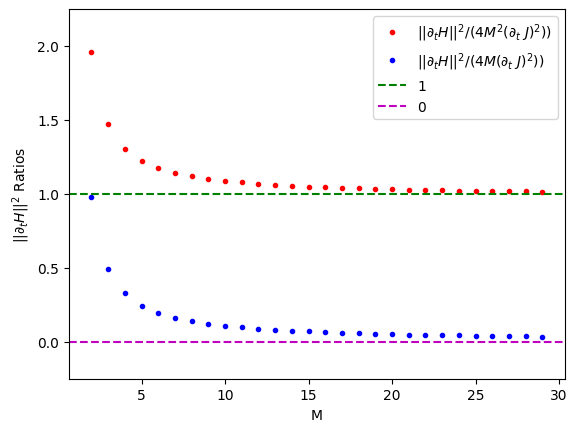

In [130]:
fig, ax = plt.subplots()
Ms = range(2,30)
colors = get_cmap("gist_rainbow",len(Ms))

T = 10
dt = 0.1
times = np.linspace(0,T,int(T/dt))

r1s = []
r2s = []
for c, M in enumerate(Ms):
    hamiltonians = []
    for t in times:
        hamiltonian = construct_rescaled_hamiltonian(N,M,V,mu_V_ratio=0,J_V_ratio=J_V_ratio_time_function(t=t,J_0=J_0,J_f=J_f,T=T))
        hamiltonians.append(hamiltonian)
    
    time_derivatives = []
    frobenius_norms = []
    for idx in range(1,len(hamiltonians)):
        dh_dt = (hamiltonians[idx] - hamiltonians[idx-1])/dt
        time_derivatives.append(dh_dt)
        
        frobenius_norm = np.linalg.norm(dh_dt)
        frobenius_norms.append(frobenius_norm)
        
    frobenius_norms = np.array(frobenius_norms)
    avg_frob_norm_sq = np.mean(frobenius_norms)**2
    
    r1 = (4*M**2*(np.abs(J_f-J_0)/T)**2)/avg_frob_norm_sq
    r2 = (4*M*(np.abs(J_f-J_0)/T)**2)/avg_frob_norm_sq
    
    r1s += [r1]
    r2s += [r2]
    
ax.plot(Ms, r1s, ".r", label = "$||\partial_t H||^2 / (4M^2(\partial_t \ J)^2)) $")
ax.plot(Ms, r2s, ".b", label = "$||\partial_t H||^2 / (4M(\partial_t \ J)^2)) $")
ax.axhline(y=1, color = "g", linestyle = "--", label = "1")
ax.axhline(y=0, color = "m", linestyle = "--", label = "0")
ax.set_ylabel("$||\partial_t H||^2$ Ratios")
ax.set_xlabel("M")
ax.set_ylim(-0.25,2.25)
ax.legend()